[View in Colaboratory](https://colab.research.google.com/github/nishi1612/SC374-Computational-and-Numerical-Methods/blob/master/Set_8.ipynb)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import math
import pandas as pd

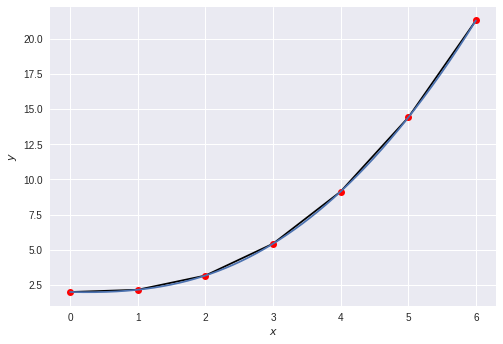

In [135]:
x = [0,1,2,3,4,5,6]
y = [2.0000 ,2.1592, 3.1697, 5.4332, 9.1411, 14.406, 21.303]

t = [0,1]
t1 = [2.0000 ,2.1592]
j = np.arange(t[0],t[len(t)-1],0.0001)
cs = CubicSpline(t,t1)
plt.plot(j,cs(j),color='black')

t = [1,2]
t1 = [2.1592, 3.1697]
j = np.arange(t[0],t[len(t)-1],0.0001)
cs = CubicSpline(t,t1)
plt.plot(j,cs(j),color='black')

t = [2,3]
t1 = [3.1697,5.4332]
j = np.arange(t[0],t[len(t)-1],0.0001)
cs = CubicSpline(t,t1)
plt.plot(j,cs(j),color='black')

t = [3,4]
t1 = [5.4332, 9.1411]
j = np.arange(t[0],t[len(t)-1],0.0001)
cs = CubicSpline(t,t1)
plt.plot(j,cs(j),color='black')

t = [4,5]
t1 = [9.1411,14.406]
j = np.arange(t[0],t[len(t)-1],0.0001)
cs = CubicSpline(t,t1)
plt.plot(j,cs(j),color='black')

t = [5,6]
t1 = [14.406, 21.303]
j = np.arange(t[0],t[len(t)-1],0.0001)
cs = CubicSpline(t,t1)
plt.plot(j,cs(j),color='black')


cs = CubicSpline(x,y)

for i in range(len(x)):
  plt.plot(x[i],y[i],color='red',marker='o')

t = np.arange(x[0],x[len(x)-1],0.0001)
plt.plot(t,cs(t))
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

In [0]:
def quadratic_lagrange(a,x):
    t = a[1]*(x-a[2])*(x-a[4])
    s = (a[0]-a[2])*(a[0]-a[4])
    j = t/s
    m = a[5]*(x-a[0])*(x-a[2])
    n = (a[4]-a[0])*(a[4]-a[2])
    i = m/n
    k = a[3]*(x-a[4])*(x-a[0])
    y = (a[2]-a[4])*(a[2]-a[0])
    l = k/y
    y = j + l + i
    return y

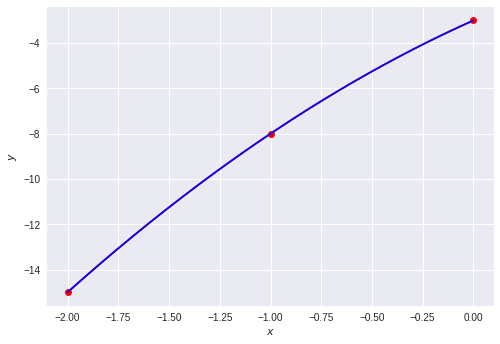

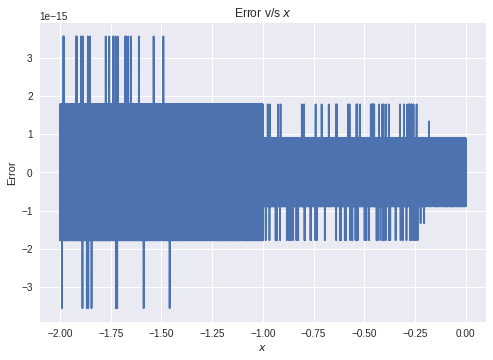

In [137]:
point1 = [-2,-15]
point2 = [-1,-8]
point3 = [0,-3]
a = point1 + point2 + point3

x = np.arange(a[0],a[4],0.0001)
y = quadratic_lagrange(a,x)
plt.plot(x,y,color='red')

t = [-2,-1,0]
t1 = [-15,-8,-3]

for i in range(len(t)):
  plt.plot(t[i],t1[i],color='red',marker='o')

cs = CubicSpline(t,t1)
plt.plot(x,cs(x),color='blue')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

plt.plot(x,cs(x)-y)
plt.xlabel('$x$')
plt.ylabel('Error')
plt.title('Error v/s $x$')
plt.show()

In [0]:
def func(x,k):
  if(k==1):
    return np.exp(x)*np.cos(4*x)
  elif(k==2):
    return x**(5/2)
  elif(k==3):
    return 1 / (1+ (x - math.pi)**2)
  elif(k==4):
    return np.exp(-1*(x**2))
  elif(k==5):
    return np.arctan(1+x**2)

def integrate_t(l,h,N,k):
  a = l
  b = h
  n = N
  h = (b-a)/n
  x = np.zeros(n+1)
  x[0] = a
  for i in range(n):
    x[i+1] = x[i] + h
  y = func(x,k)
  t = h*(-y[0]/2 - y[len(y)-1]/2 + np.sum(y))
  return round(t,5)

def integrate_s(l,h,N,k):
  a = l
  b = h
  n = N
  h = (b-a)/n
  x = np.zeros(n+1)
  x[0] = a
  for i in range(n):
    x[i+1] = x[i] + h
  y = func(x,k)
  t = 0
  for i in range(len(y)):
    if(i==0 or i==len(y)-1):
      t = t + y[i]
    elif(i%2==1):
      t = t + 4*y[i]
    else:
      t = t + 2*y[i]
  t = (h*t)/3
  return round(t,5)

def solver(l,h,k,g):
  a = []
  for i in range(9):
    a.append(2**(i+1))
  ans_t = []
  ans_s = []

  table = pd.DataFrame(columns=['n','T(n)','Error(Trapezoidal)','S(n)','Error(Simpson)'])  

  for i in range(len(a)):
    ans_t.append(integrate_t(l,h,a[i],k))
    ans_s.append(integrate_s(l,h,a[i],k))
    table.loc[i] = [a[i],ans_t[i] , g - ans_t[i],ans_s[i],g-ans_s[i]]
  
  return table

In [140]:
print(round((math.exp(math.pi) - 1) /17 , 5))
solver(0,math.pi,1,round((math.exp(math.pi) - 1) /17 , 5))

1.30239


,n,T(n),Error(Trapezoidal),S(n),Error(Simpson)
0,2.0,26.51634,-25.21395,22.71508,-21.41269
1,4.0,3.24905,-1.94666,-4.50671,5.80910
2,8.0,1.62453,-0.32214,1.08302,0.21937
3,16.0,1.37572,-0.07333,1.29279,0.00960
4,32.0,1.32031,-0.01792,1.30184,0.00055
5,64.0,1.30685,-0.00446,1.30236,0.00003
6,128.0,1.30351,-0.00112,1.30239,0.00000
7,256.0,1.30267,-0.00028,1.30239,0.00000
8,512.0,1.30246,-0.00007,1.30239,0.00000


In [141]:
print(round(2/7,5))
solver(0,1,2,round(2/7,5))

0.28571


,n,T(n),Error(Trapezoidal),S(n),Error(Simpson)
0,2.0,0.33839,-0.05268,0.28452,0.00119
1,4.0,0.29879,-0.01308,0.28559,0.00012
2,8.0,0.28897,-0.00326,0.28570,0.00001
3,16.0,0.28653,-0.00082,0.28571,0.00000
4,32.0,0.28592,-0.00021,0.28571,0.00000
5,64.0,0.28577,-0.00006,0.28571,0.00000
6,128.0,0.28573,-0.00002,0.28571,0.00000
7,256.0,0.28572,-0.00001,0.28571,0.00000
8,512.0,0.28572,-0.00001,0.28571,0.00000


In [142]:
print(round(math.atan(5-math.pi) + math.atan(math.pi),5))
solver(0,5,3,round(math.atan(5-math.pi) + math.atan(math.pi),5))

2.33977


,n,T(n),Error(Trapezoidal),S(n),Error(Simpson)
0,2.0,2.16665,0.17312,2.62510,-0.28533
1,4.0,2.26867,0.07110,2.30267,0.03710
2,8.0,2.33227,0.00750,2.35347,-0.01370
3,16.0,2.33781,0.00196,2.33966,0.00011
4,32.0,2.33928,0.00049,2.33977,0.00000
5,64.0,2.33964,0.00013,2.33977,0.00000
6,128.0,2.33974,0.00003,2.33977,0.00000
7,256.0,2.33976,0.00001,2.33977,0.00000
8,512.0,2.33976,0.00001,2.33977,0.00000


In [143]:
print(round(math.sqrt(math.pi)/2,5))
solver(0,10,4,round(math.sqrt(math.pi)/2,5))

0.88623


,n,T(n),Error(Trapezoidal),S(n),Error(Simpson)
0,2.0,2.50000,-1.61377,1.66667,-0.78044
1,4.0,1.25483,-0.36860,0.83977,0.04646
2,8.0,0.88943,-0.00320,0.76763,0.11860
3,16.0,0.88623,0.00000,0.88516,0.00107
4,32.0,0.88623,0.00000,0.88623,0.00000
5,64.0,0.88623,0.00000,0.88623,0.00000
6,128.0,0.88623,0.00000,0.88623,0.00000
7,256.0,0.88623,0.00000,0.88623,0.00000
8,512.0,0.88623,0.00000,0.88623,0.00000


In [144]:
print(2.17426)
solver(0,2,5,2.17426)

2.17426


,n,T(n),Error(Trapezoidal),S(n),Error(Simpson)
0,2.0,2.18655,-0.01229,2.19580,-0.02154
1,4.0,2.17745,-0.00319,2.17442,-0.00016
2,8.0,2.17506,-0.00080,2.17426,0.00000
3,16.0,2.17446,-0.00020,2.17426,0.00000
4,32.0,2.17431,-0.00005,2.17426,0.00000
5,64.0,2.17427,-0.00001,2.17426,0.00000
6,128.0,2.17426,0.00000,2.17426,0.00000
7,256.0,2.17426,0.00000,2.17426,0.00000
8,512.0,2.17426,0.00000,2.17426,0.00000


In [0]:
def function(x,k):
  if(k==1):
    return math.atan(x**2 - x + 1)
  elif (k==2):
    return math.atan(100*x**2 - 199*x + 100)
  
def derivative_function(x,k):
  if (k==1):
    return (2*x - 1) / ((x**2 - x + 1)**2 + 1)
  elif(k==2):
    return (200*x - 199) / ((100*x**2 - 199*x + 100)**2 + 1)
    

def forward_difference(x,h,k):
  return (function(x+h,k) - function(x,k)) / h

def central_difference(x,h,k):
  return (function(x+h,k) - function(x-h,k)) / (2*h)


In [146]:
a = [0.1,0.05,0.025,0.0125,0.00625]
x = 1

table = pd.DataFrame(columns=['h','Forward Difference','Error (Forward Difference)','Central Difference','Error (Central Difference)'])  

for i in range(len(a)):
  table.loc[i] = [ a[len(a)-1-i] ,round(forward_difference(x,a[len(a)-1-i],1),4) , round(derivative_function(x,1),4) - round(forward_difference(x,a[len(a)-1-i],1),4) , round(central_difference(x,a[len(a)-1-i],1),4) , round(derivative_function(x,1),4) - round(central_difference(x,a[len(a)-1-i],1),4)]
 
print(round(derivative_function(x,1),4))

table

0.5


,h,Forward Difference,Error (Forward Difference),Central Difference,Error (Central Difference)
0,0.00625,0.5015,-0.0015,0.5000,0.0000
1,0.01250,0.5031,-0.0031,0.4999,0.0001
2,0.02500,0.5060,-0.0060,0.4997,0.0003
3,0.05000,0.5115,-0.0115,0.4990,0.0010
4,0.10000,0.5209,-0.0209,0.4959,0.0041


In [147]:
table = pd.DataFrame(columns=['h','Forward Difference','Error(Forward Difference)','Central Difference','Error(Central Difference)'])  

for i in range(len(a)):
  table.loc[i] = [ a[len(a)-1-i] ,round(forward_difference(x,a[len(a)-1-i],2),4) , round(derivative_function(x,2),4) - round(forward_difference(x,a[len(a)-1-i],2),4) , round(central_difference(x,a[len(a)-1-i],2),4) , round(derivative_function(x,2),4) - round(central_difference(x,a[len(a)-1-i],2),4)]
 
print(round(derivative_function(x,2),4))

table

0.5


,h,Forward Difference,Error(Forward Difference),Central Difference,Error(Central Difference)
0,0.00625,0.8084,-0.3084,0.4981,0.0019
1,0.01250,1.1093,-0.6093,0.4923,0.0077
2,0.02500,1.6757,-1.1757,0.4698,0.0302
3,0.05000,2.5941,-2.0941,0.3904,0.1096
4,0.10000,3.4098,-2.9098,0.2003,0.2997
